In [4]:
import numpy as np
from skimage import io, color, exposure
import matplotlib.pyplot as plt
# import cv2

In [5]:
# I = io.imread("land.jpeg")
I = io.imread("/content/tsukuba_l.png")
# I = io.imread("Capture1.jpg")
print(I.shape)

(288, 384)


(-0.5, 383.5, 287.5, -0.5)

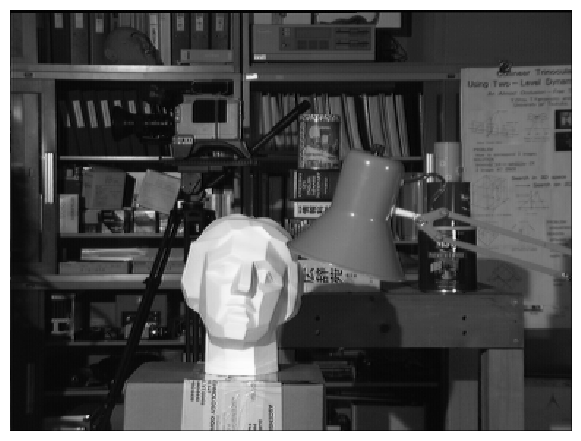

In [6]:
io.imshow(I)
plt.axis("off")

# Plotting Histogram

In [7]:
def plot_hist(I, nbins=256, normalize=False, plot_cdf=True):
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=nbins, normalize=normalize)
    plt.plot(bins_hist, hist, 'k')
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])

    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=nbins)
        plt.twinx()
        plt.plot(bins_cdf, cdf, 'r', lw=3)
        plt.ylabel("percentage")

In [8]:
def plot_img_and_hist(I, nbins=256, normalize=False, plot_cdf=True, figsize=(12, 6)):
    fig, ax = plt.subplots(2, 1, figsize=figsize)
    plt.subplot(2, 1, 1)
    io.imshow(I)
    plt.axis("off")
    plt.title("image")

    plt.subplot(2, 1, 2)
    plot_hist(I, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")

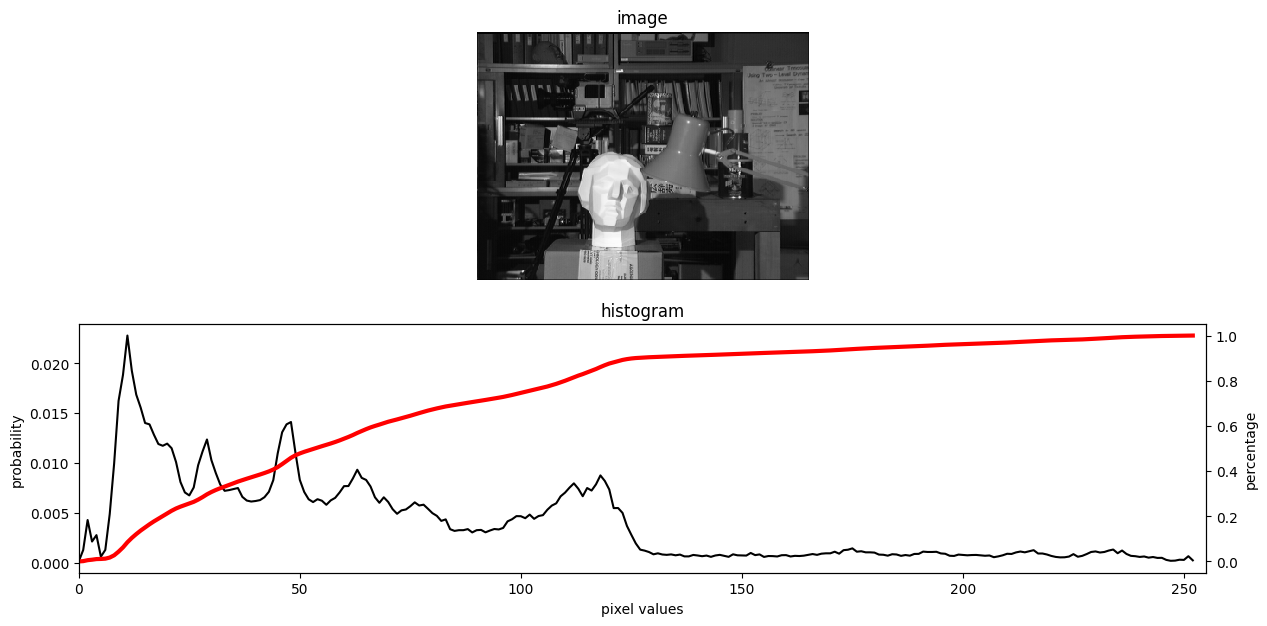

In [9]:
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I, normalize=True)
plt.show()

## Histogram of Color Image

In [10]:
I = io.imread("/content/cat.jpg")
print(I.shape)

(360, 506, 3)


(-0.5, 505.5, 359.5, -0.5)

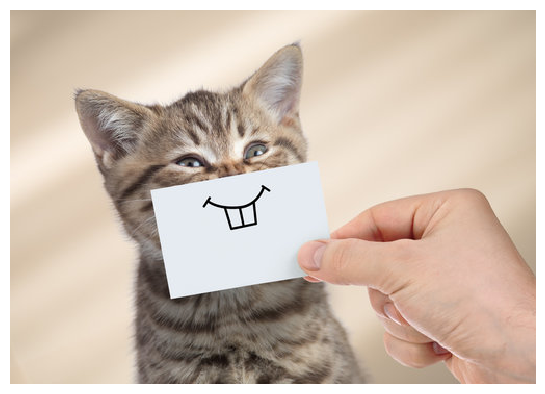

In [11]:
io.imshow(I)
plt.axis("off")

In [12]:
def plot_hist_color(I, nbins=256, normalize=False):
    color=['r', 'g', 'b']
    plt.figure(figsize=(8,5))
    for i in range(3):
        hist, bins_hist = exposure.histogram(I[:, :, i].ravel(), nbins=nbins, normalize=normalize)
        plt.plot(bins_hist, hist, color[i])

    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])
    plt.legend(['Red channel', 'Green channel', 'Blue channel'])

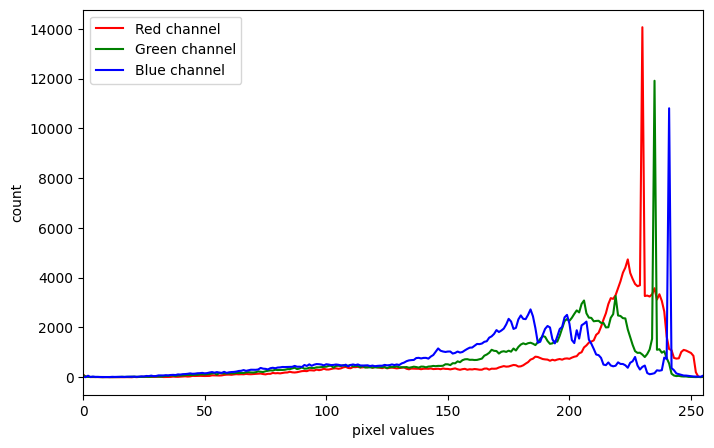

In [13]:
plot_hist_color(I)
plt.show()

Text(0.5, 1.0, 'Blue')

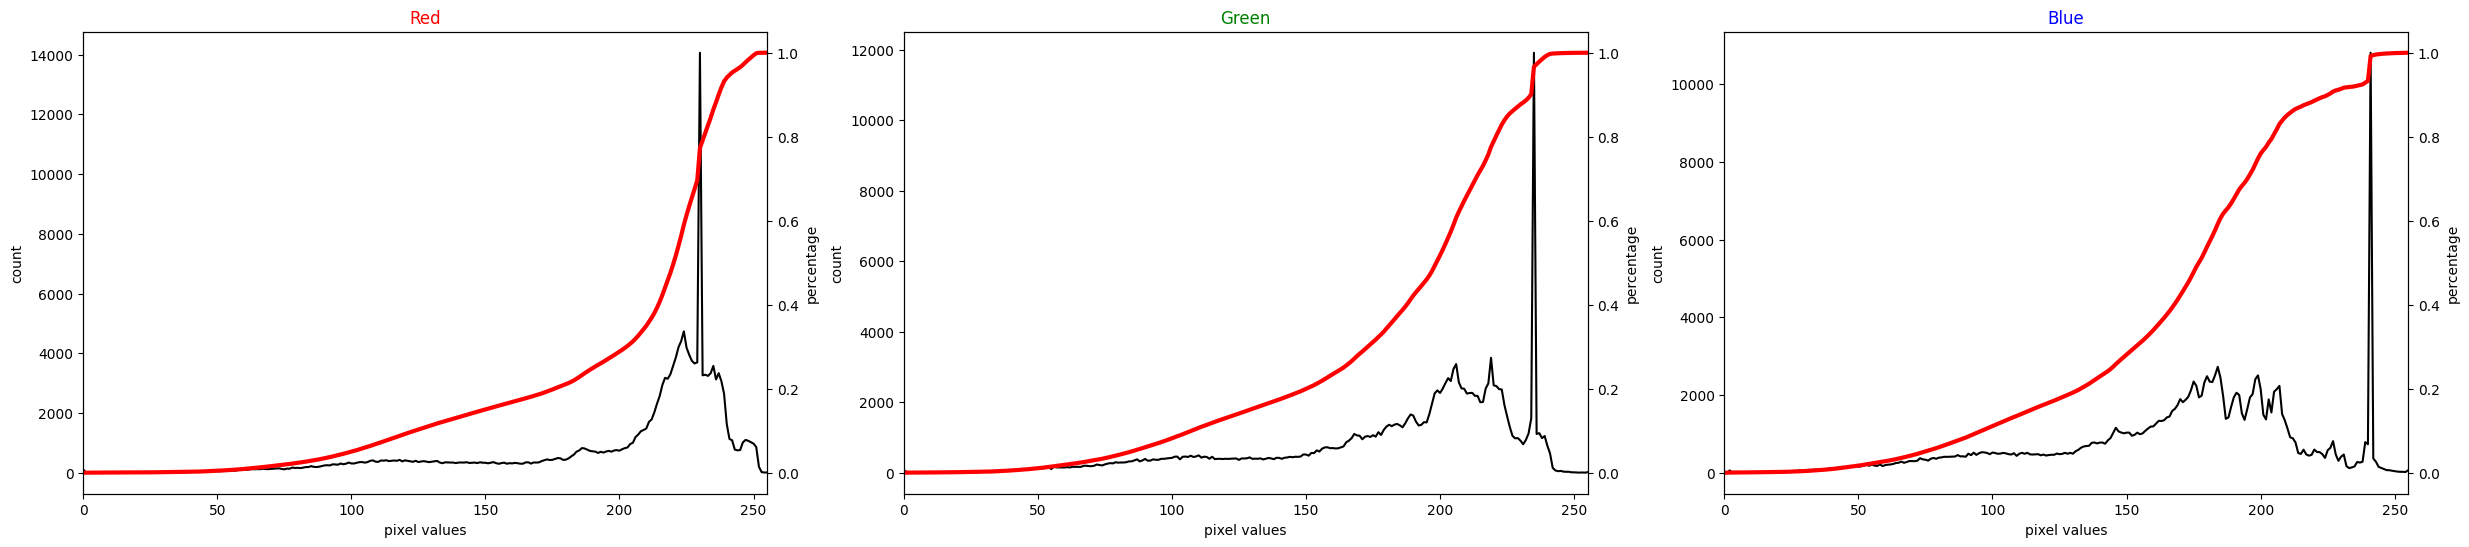

In [ ]:
plt.rcParams['figure.figsize'] = (30, 6)
plt.subplot(1, 3, 1)
plot_hist(I[:, :, 0], plot_cdf=True)
plt.title("Red", color="red")

plt.subplot(1, 3, 2)
plot_hist(I[:, :, 1], plot_cdf=True)
plt.title("Green", color="green")

plt.subplot(1, 3, 3)
plot_hist(I[:, :, 2], plot_cdf=True)
plt.title("Blue", color="blue")

# Histogram Equalization

In [14]:
I = io.imread("/content/tsukuba_l.png")
I = I/255
print(I.shape)

(288, 384)


In [15]:
Ieq = exposure.equalize_hist(I)

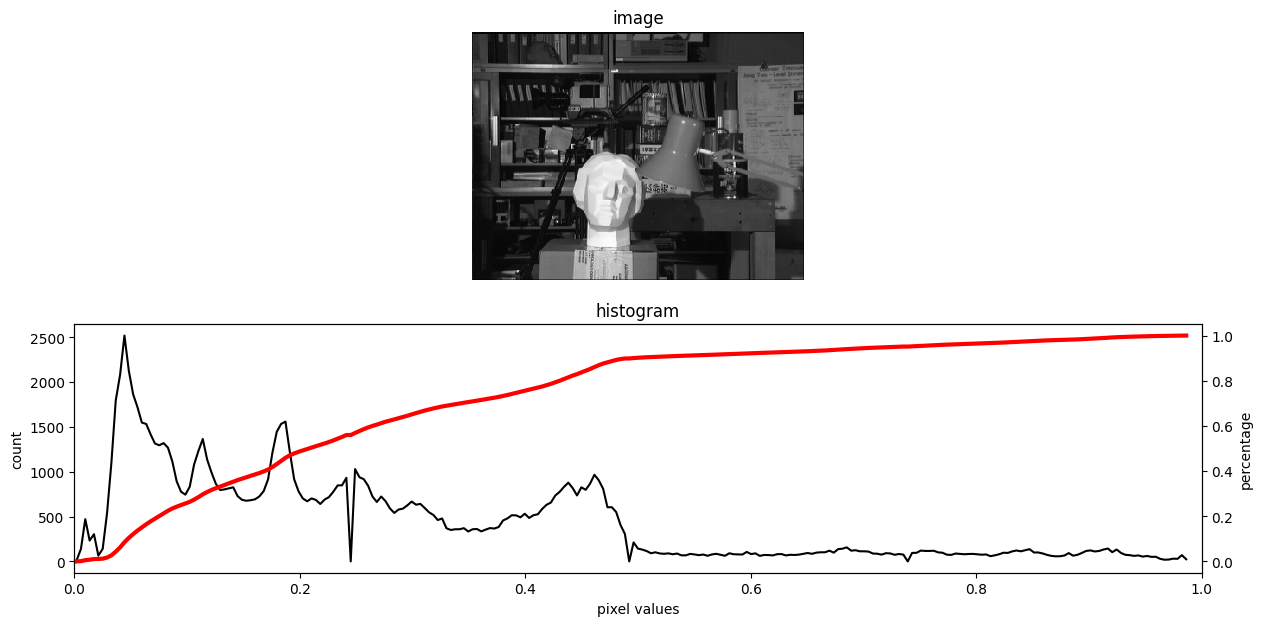

In [16]:
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I)

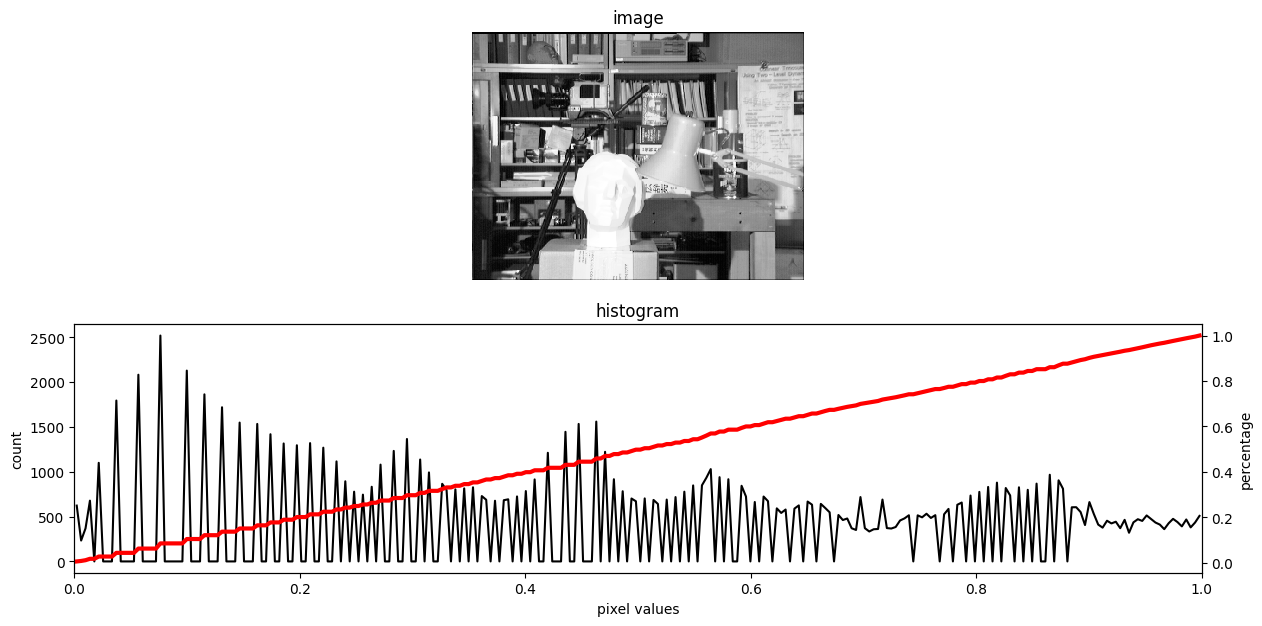

In [17]:
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(Ieq)

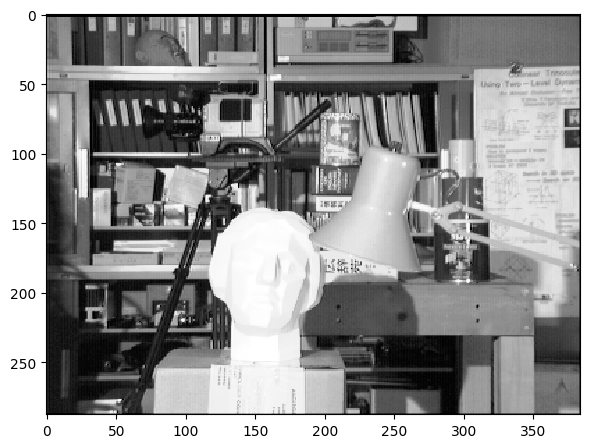

In [18]:
io.imshow(Ieq)

In [19]:
I = io.imread("/content/tsukuba_l.png")
I = I/255

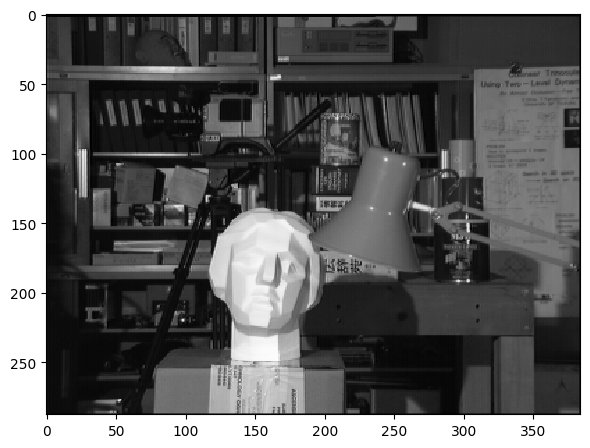

In [20]:
io.imshow(I)

In [ ]:
# cv2.imwrite("Tsukuba.jpeg", (I11*255).astype(int))

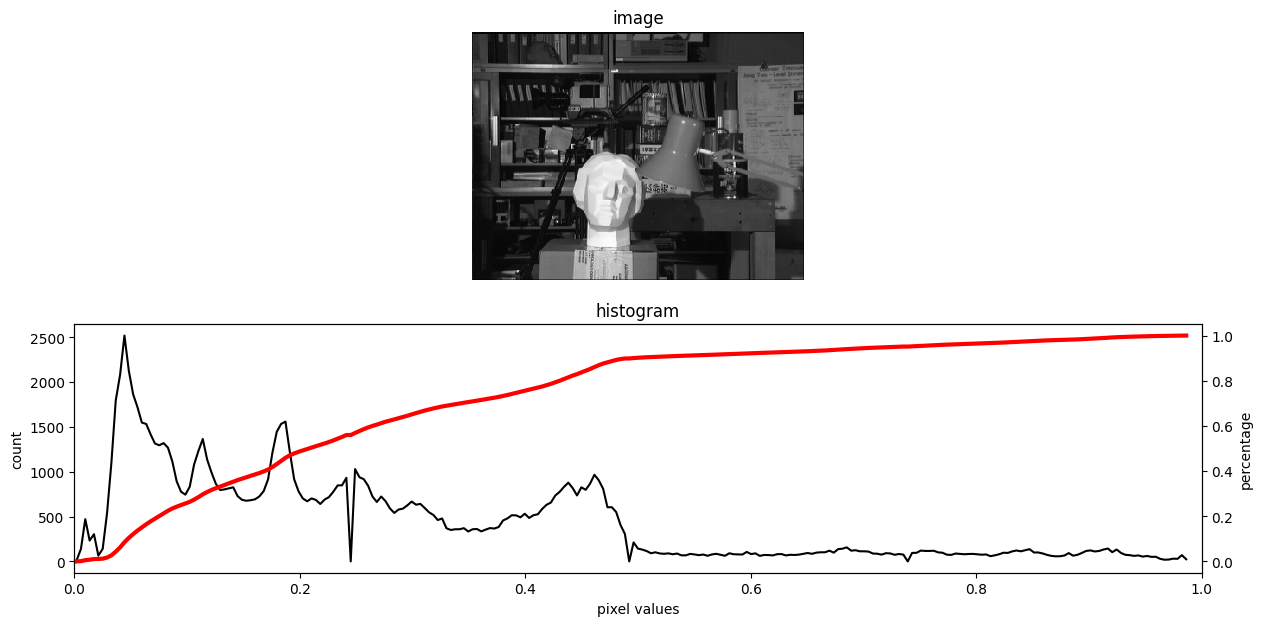

In [21]:
plot_img_and_hist(I)

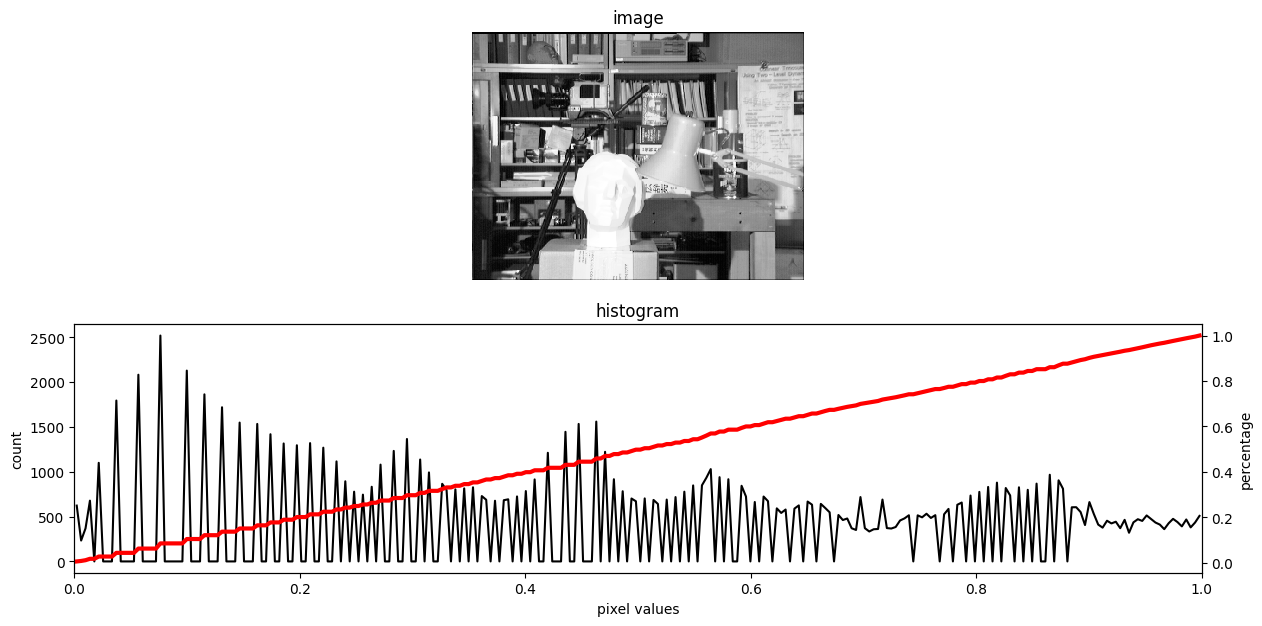

In [22]:
Ieq = exposure.equalize_hist(I)
plot_img_and_hist(Ieq)

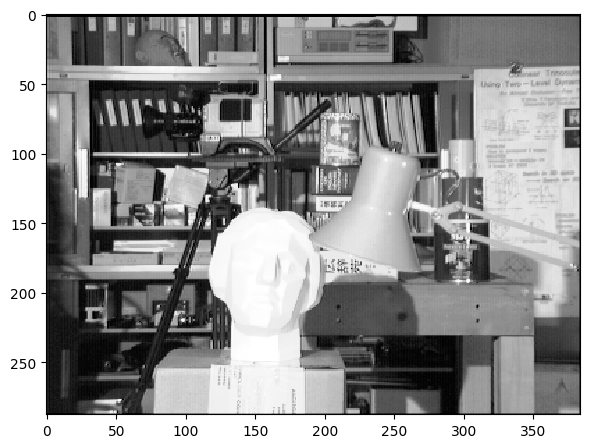

In [23]:
io.imshow(Ieq)

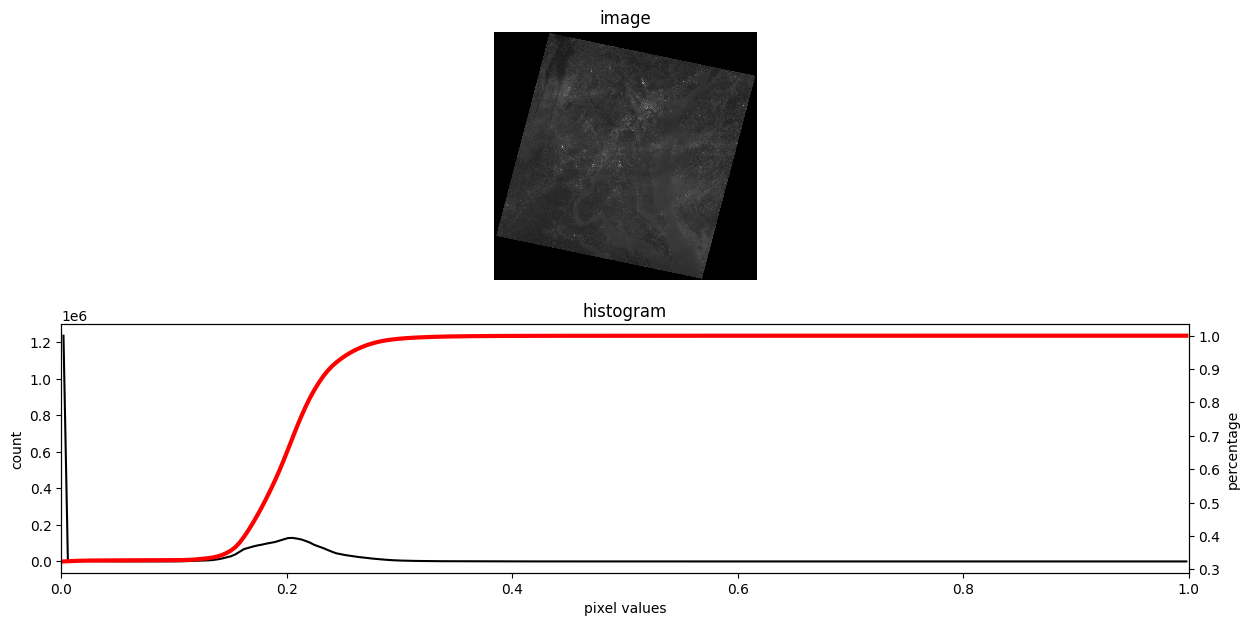

In [24]:
I = io.imread("/content/landsat_down.jpeg")
I = I/255
plot_img_and_hist(I, plot_cdf=True)

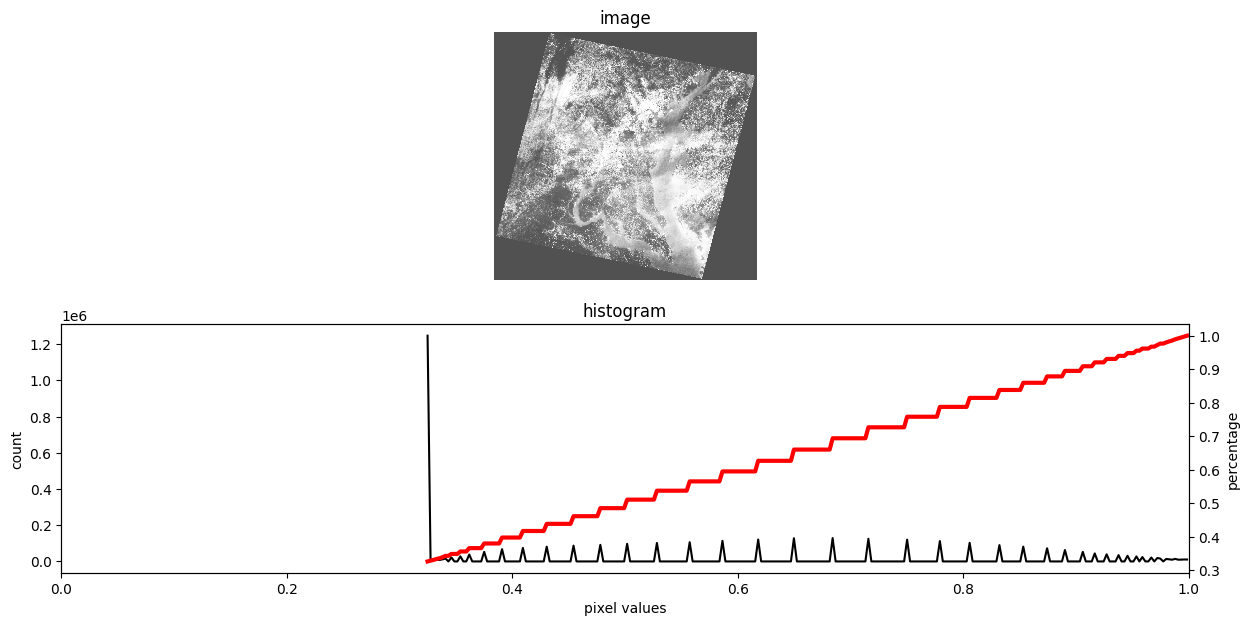

In [25]:
Ieq = exposure.equalize_hist(I)
plot_img_and_hist(Ieq)

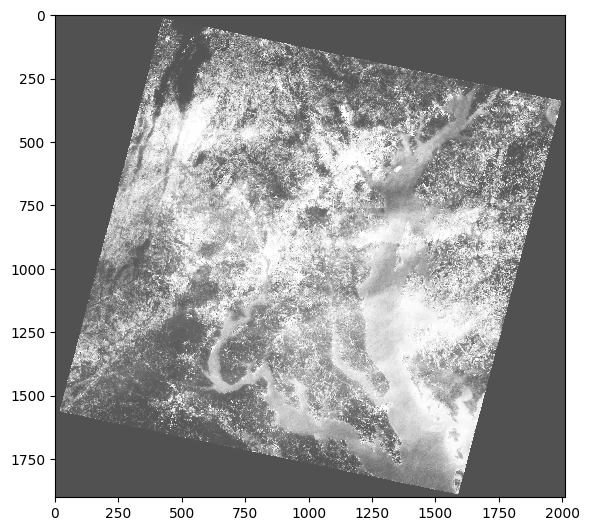

In [26]:
io.imshow(Ieq)

In [28]:
I = io.imread("/content/cat.jpg")
I = I/255

In [30]:
Ieq = I.copy()
Ieq[:, :, 0] = exposure.equalize_hist(I[:, :, 0])
Ieq[:, :, 1] = exposure.equalize_hist(I[:, :, 1])
Ieq[:, :, 2] = exposure.equalize_hist(I[:, :, 2])

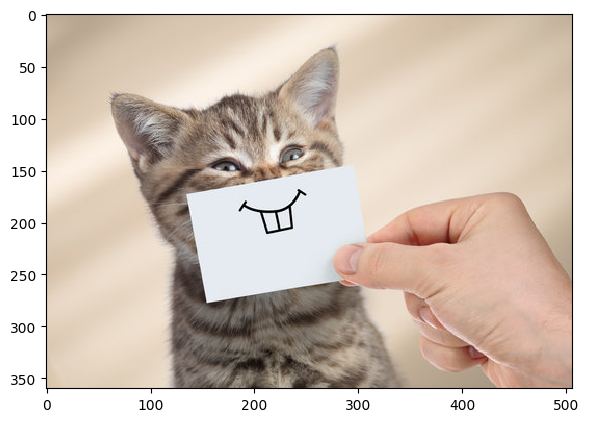

In [29]:
io.imshow(I)

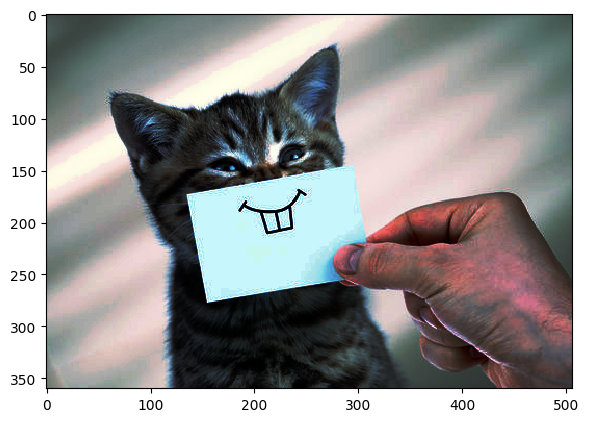

In [31]:
io.imshow(Ieq)

In [32]:
Ilab = color.rgb2lab(I)

In [33]:
print(I.shape)
print(Ilab.shape)

(360, 506, 3)
(360, 506, 3)


In [34]:
print(Ilab[:, :, 0].min())
print(Ilab[:, :, 0].max())

0.0
99.92678386264788


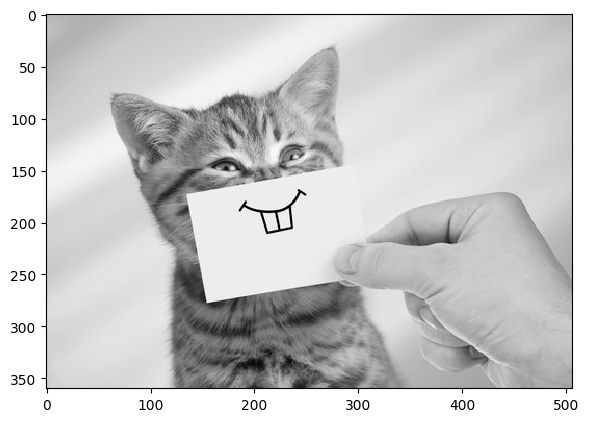

In [35]:
io.imshow(Ilab[:, :, 0]/100)
# io.imshow(Ilab[:, :, 2])

In [36]:
Ilab[:, :, 0] = Ilab[:, :, 0]/100

In [37]:
Ieq = exposure.equalize_hist(Ilab[:, :, 0])

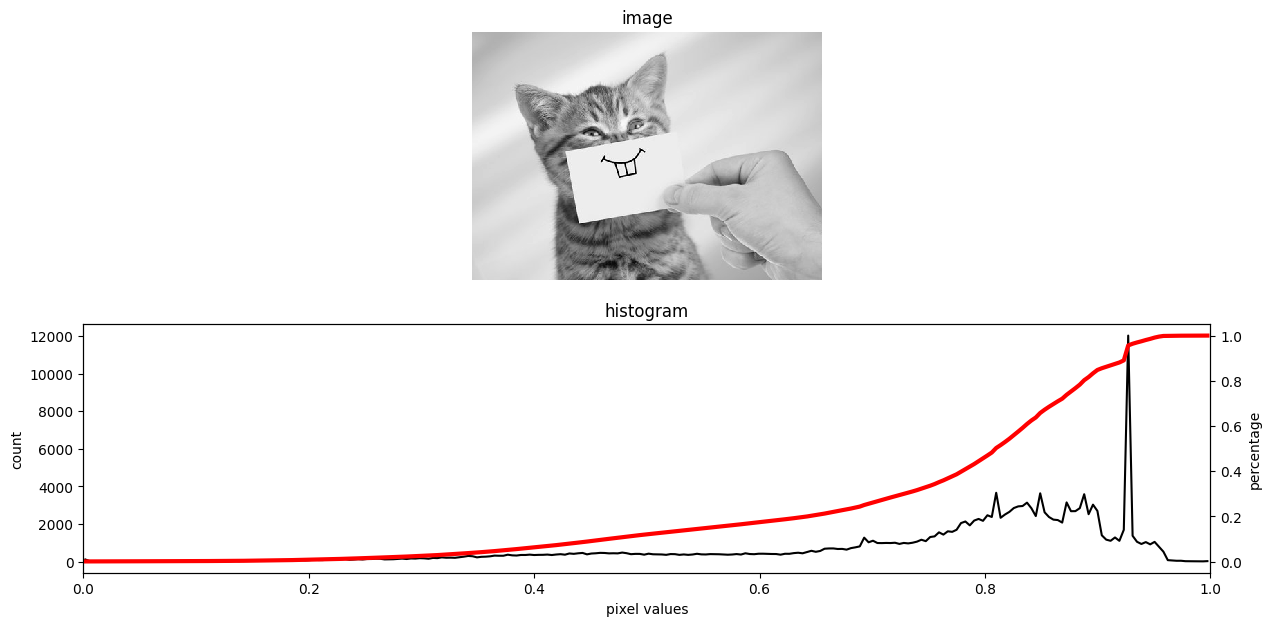

In [38]:
plot_img_and_hist(Ilab[:, :, 0])

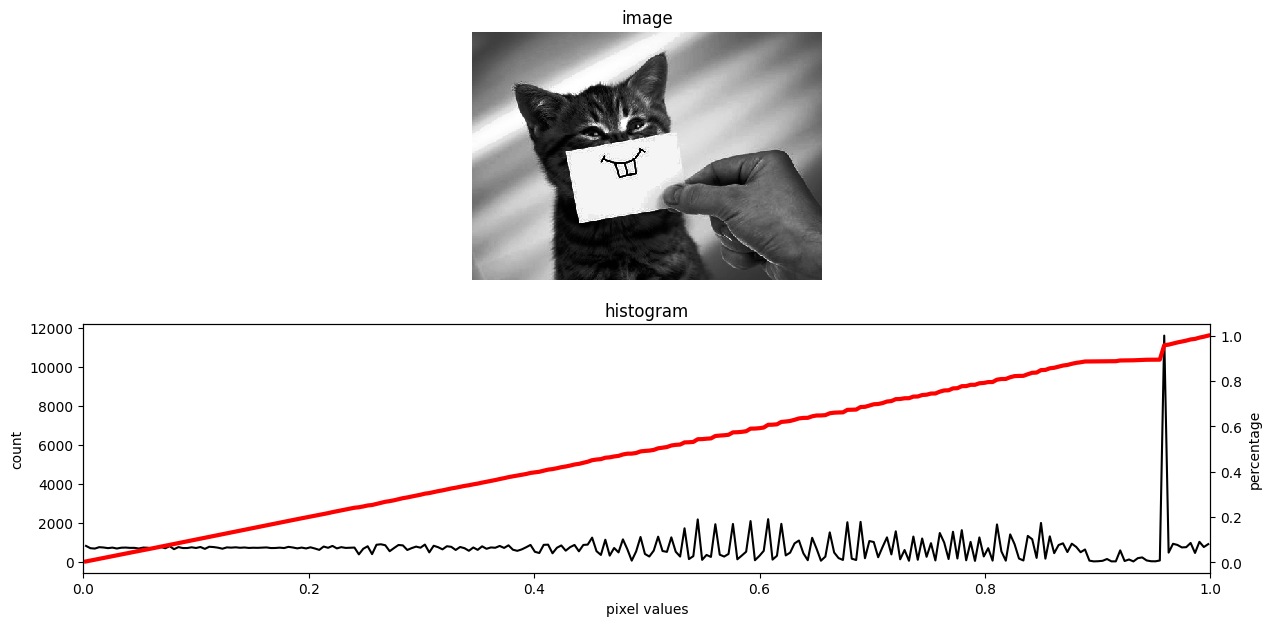

In [39]:
plot_img_and_hist(Ieq)

# Degrading Image

In [41]:
I = io.imread("/content/tsukuba_l.png")
I = I/255

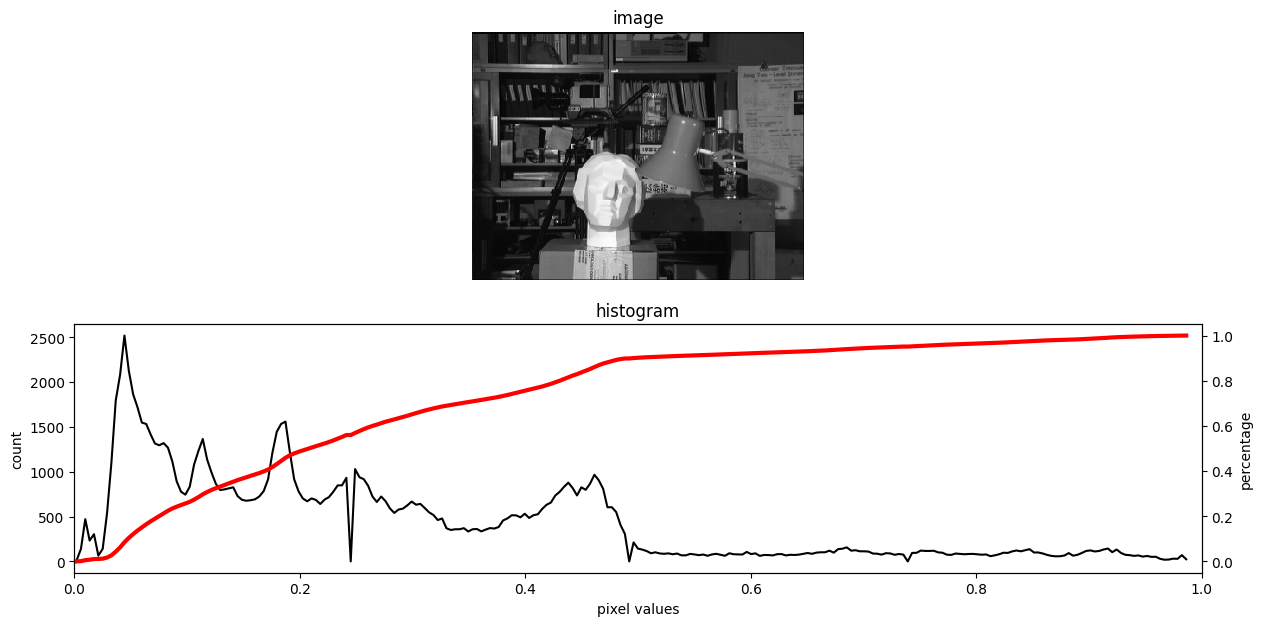

In [42]:
plot_img_and_hist(I)

In [43]:
Idegraded = exposure.rescale_intensity(I, in_range=(0, 1), out_range=(0.6, 0.8))

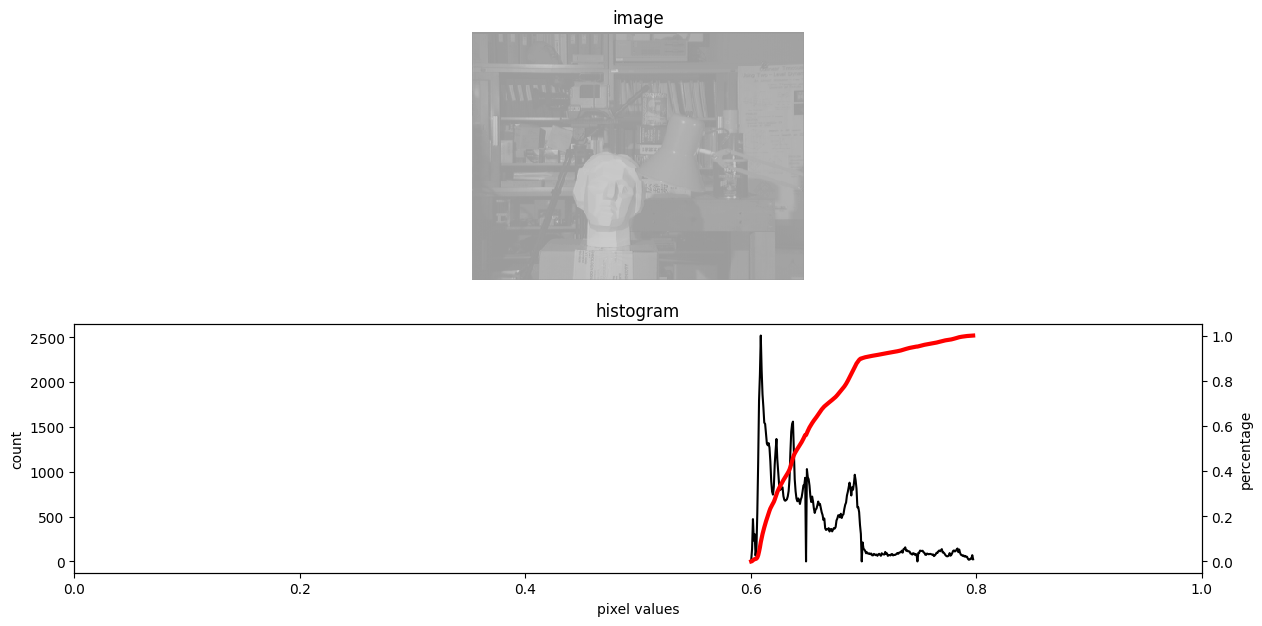

In [44]:
plot_img_and_hist(Idegraded)

In [45]:
Ieq_degraded = exposure.equalize_hist(Idegraded)

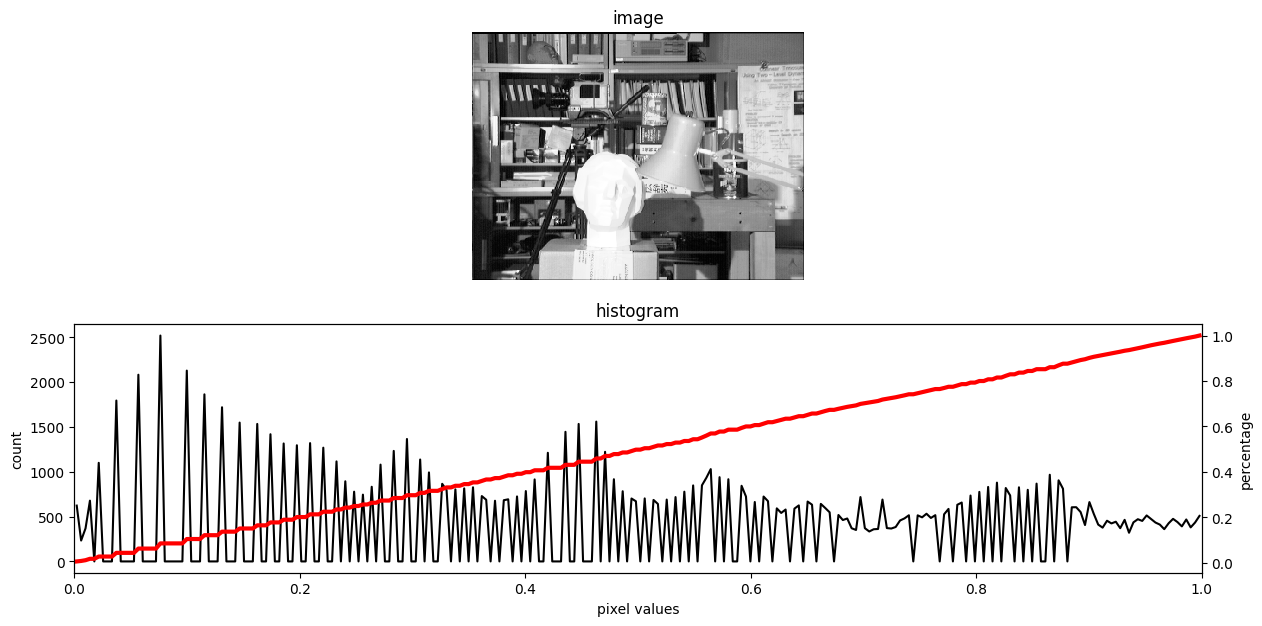

In [46]:
plot_img_and_hist(Ieq_degraded)

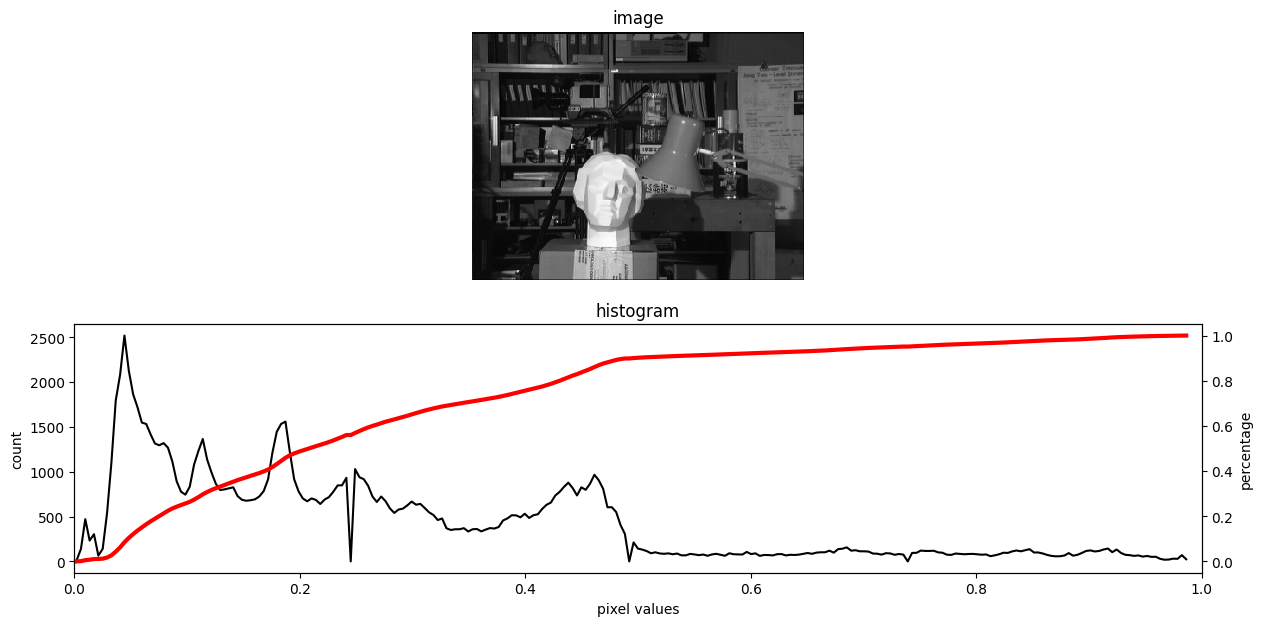

In [50]:
I = io.imread("/content/tsukuba_l.png")
I = I/255
plot_img_and_hist(I)

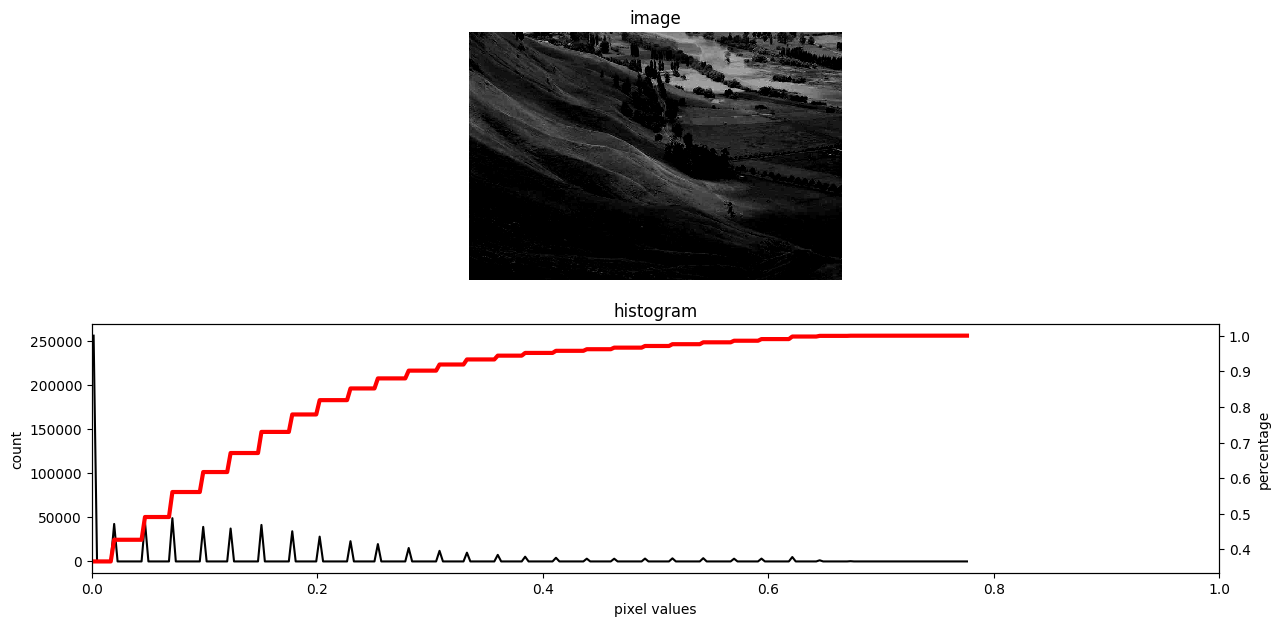

In [49]:
Idegraded = exposure.rescale_intensity(I, in_range=(0.75, 0.9), out_range=(0, 1))
plot_img_and_hist(Idegraded)

## Degrading color image

In [52]:
I = io.imread("/content/cat.jpg")
I = I/255

In [53]:
Ilab = color.rgb2lab(I)

In [54]:
Ilab[:, :, 0] = Ilab[:, :, 0]/100

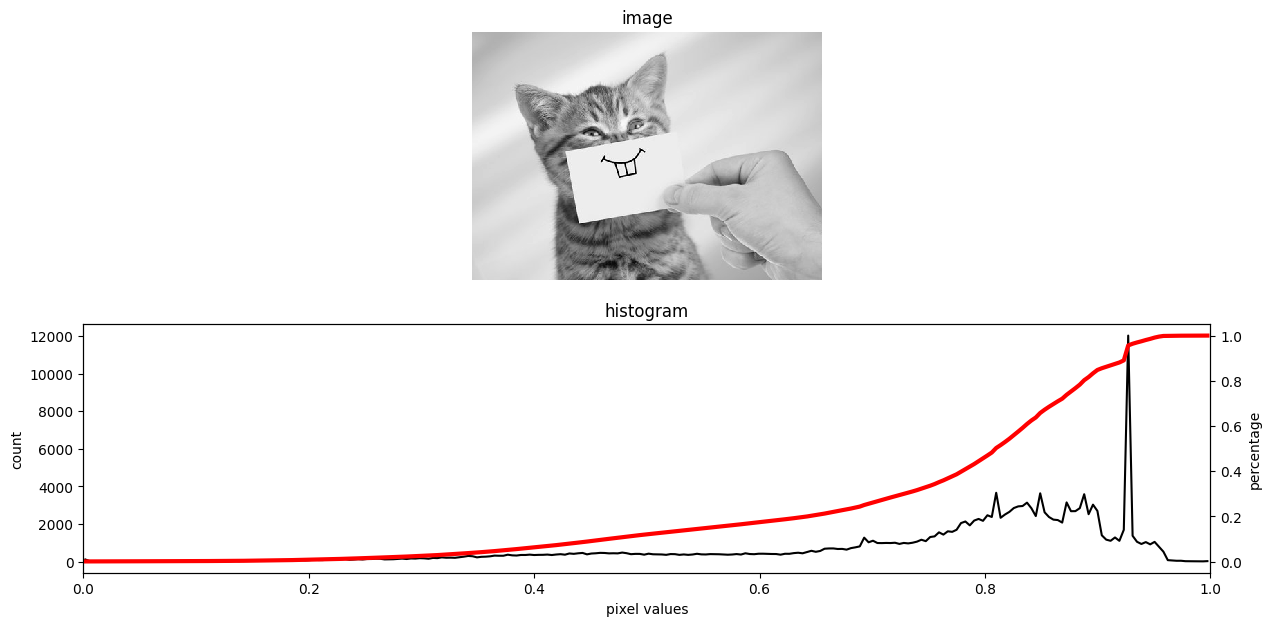

In [55]:
plot_img_and_hist(Ilab[:, :, 0])

In [56]:
Idegraded_l = exposure.rescale_intensity(Ilab[:, :, 0], in_range=(0, 1), out_range=(0.4, 0.6))

In [57]:
Ilab[:, :, 0] = Idegraded_l*100

In [58]:
Idegraded = color.lab2rgb(Ilab)

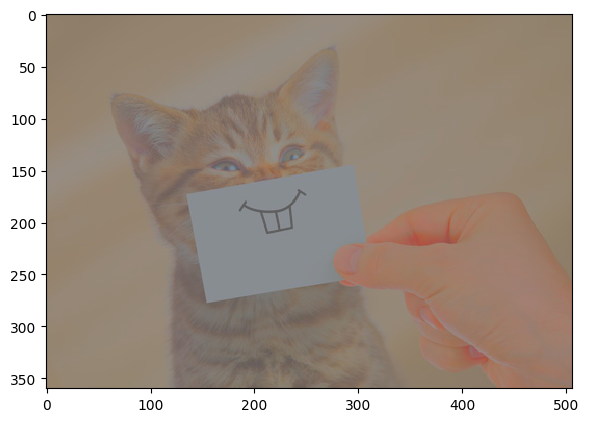

In [59]:
io.imshow(Idegraded)

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


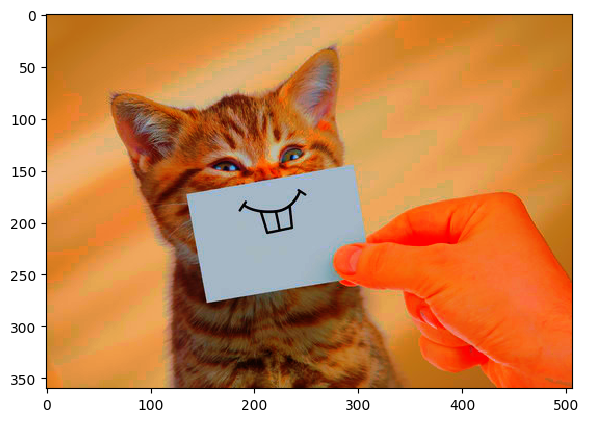

In [60]:
Ieq_degraded = exposure.equalize_hist(Idegraded)
io.imshow(Ieq_degraded)

# Adaptive Histogram Equalization

In [62]:
I = io.imread("/content/tsukuba_l.png")
I = I/255

In [63]:
I_adapt_eq = exposure.equalize_adapthist(I, kernel_size=(128, 128), clip_limit=0)

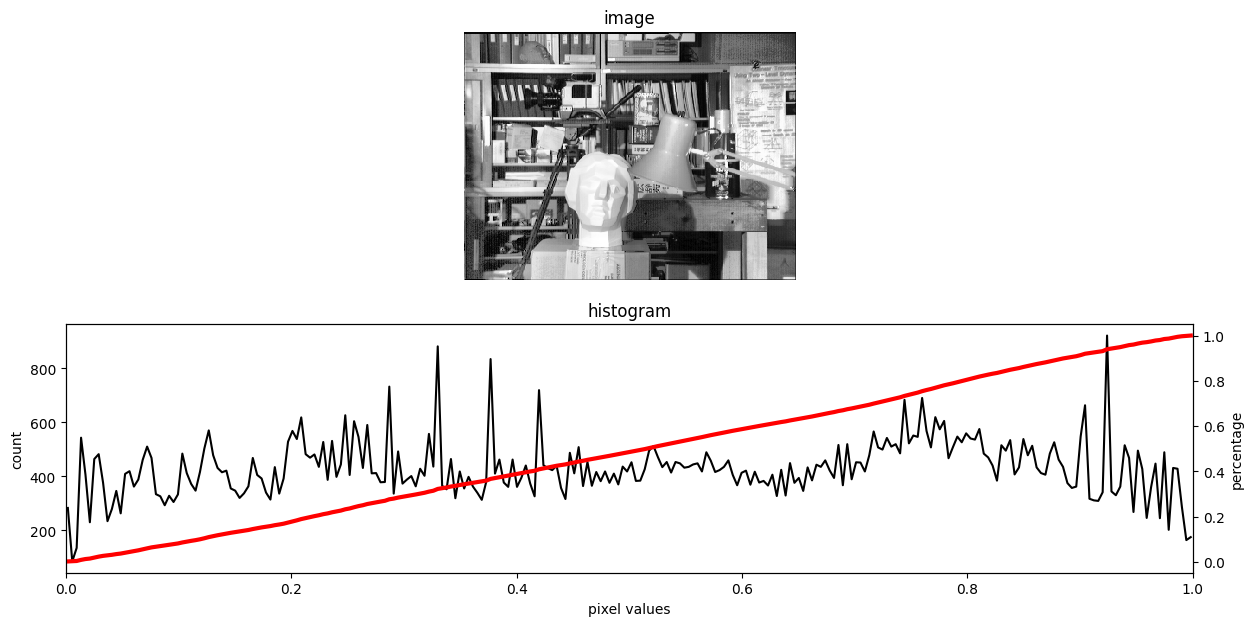

In [64]:
plot_img_and_hist(I_adapt_eq)

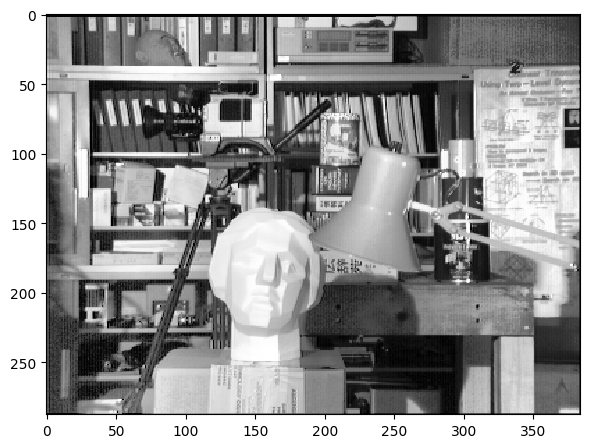

In [65]:
io.imshow(I_adapt_eq)

In [67]:
I = io.imread("/content/cat.jpg")
I = I/255
I = color.rgb2gray(I)
# I=I[:,I.shape[1]//2:]
# I=I[:,:I.shape[1]//2]
print(I.shape)

(360, 506)


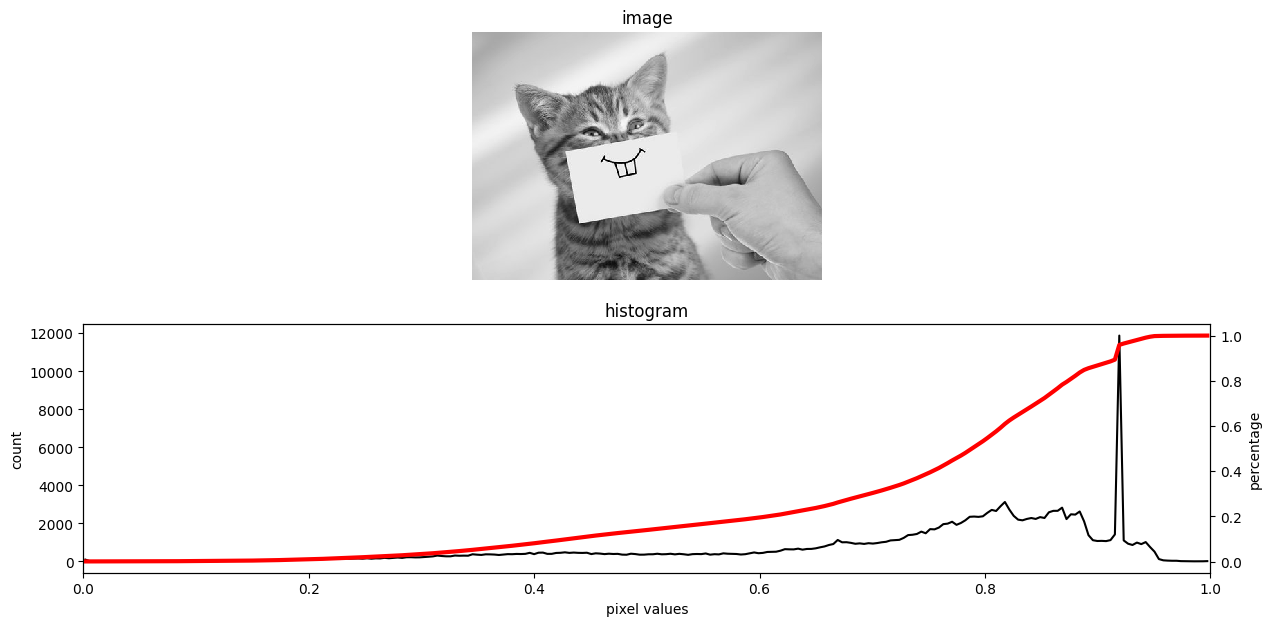

In [68]:
plot_img_and_hist(I)

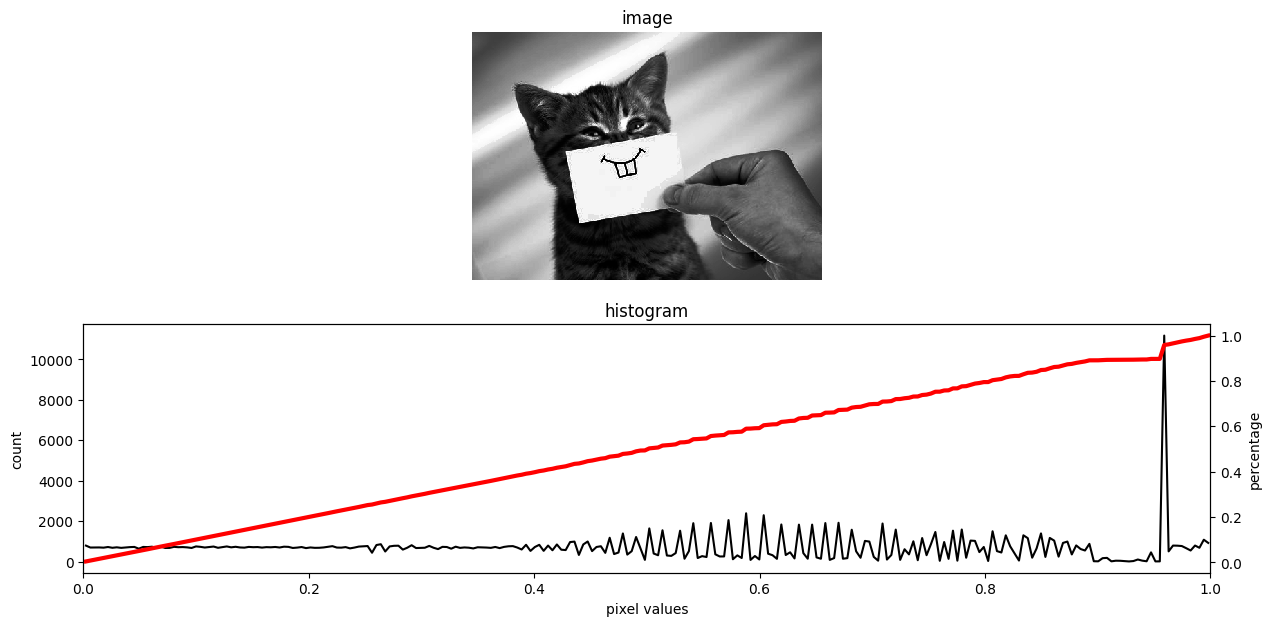

In [69]:
Ieq = exposure.equalize_hist(I)
plot_img_and_hist(Ieq)

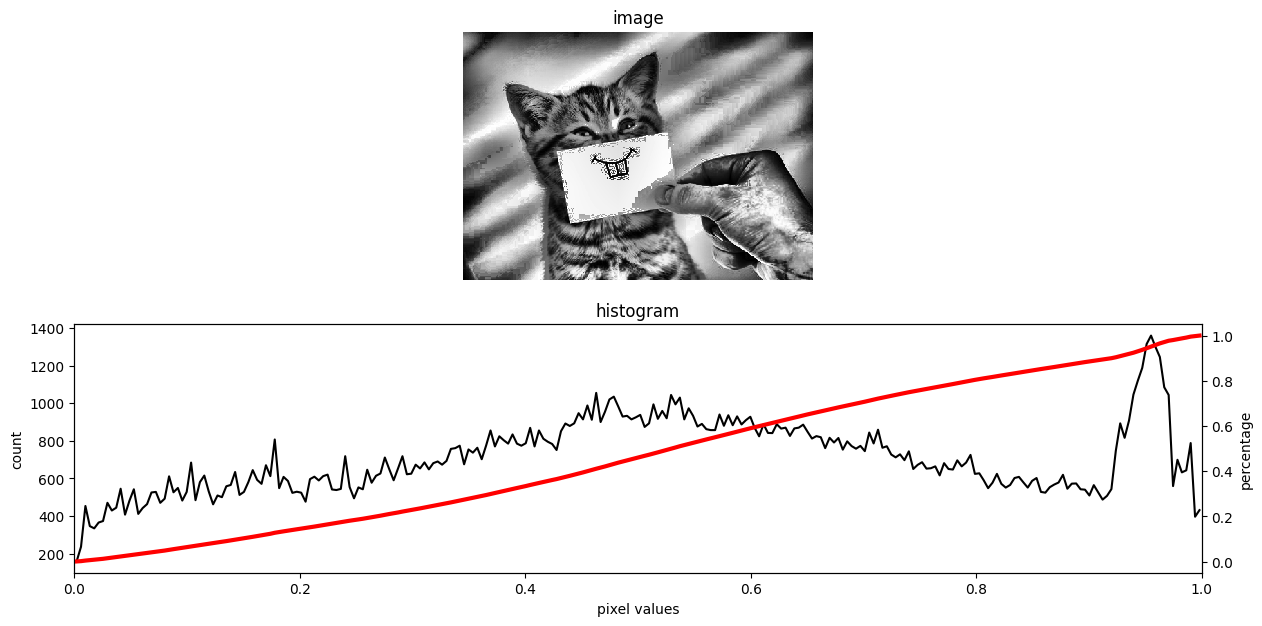

In [70]:
I_AHE = exposure.equalize_adapthist(I, kernel_size=(64, 64), clip_limit=0)
plot_img_and_hist(I_AHE)

# CLAHE

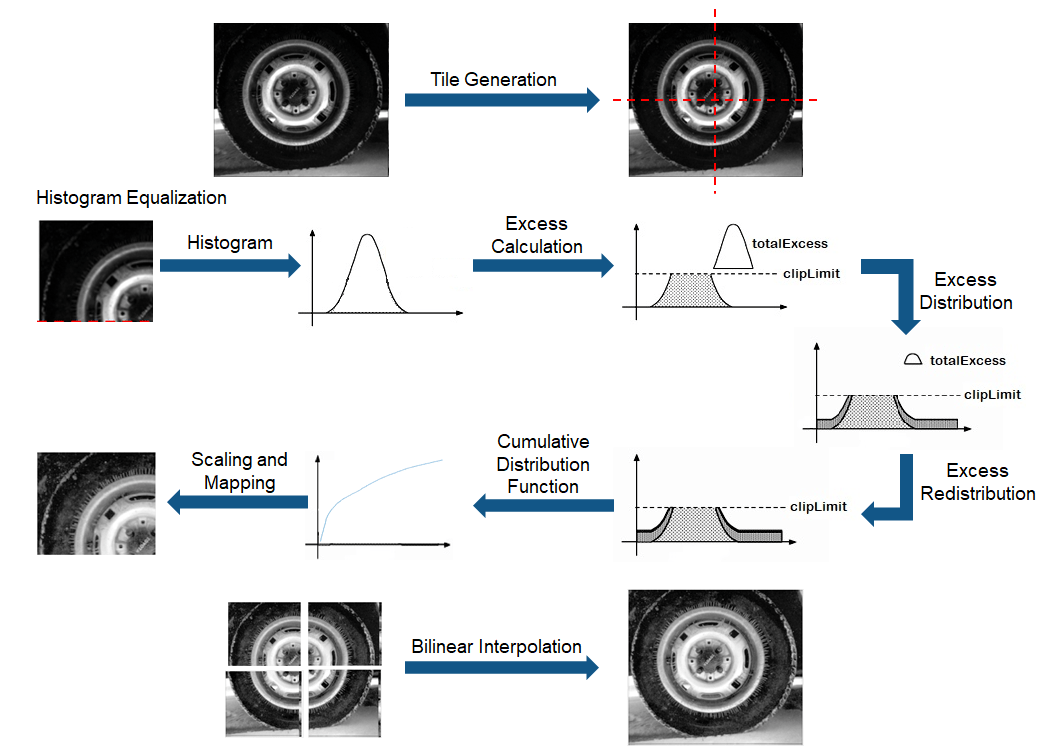

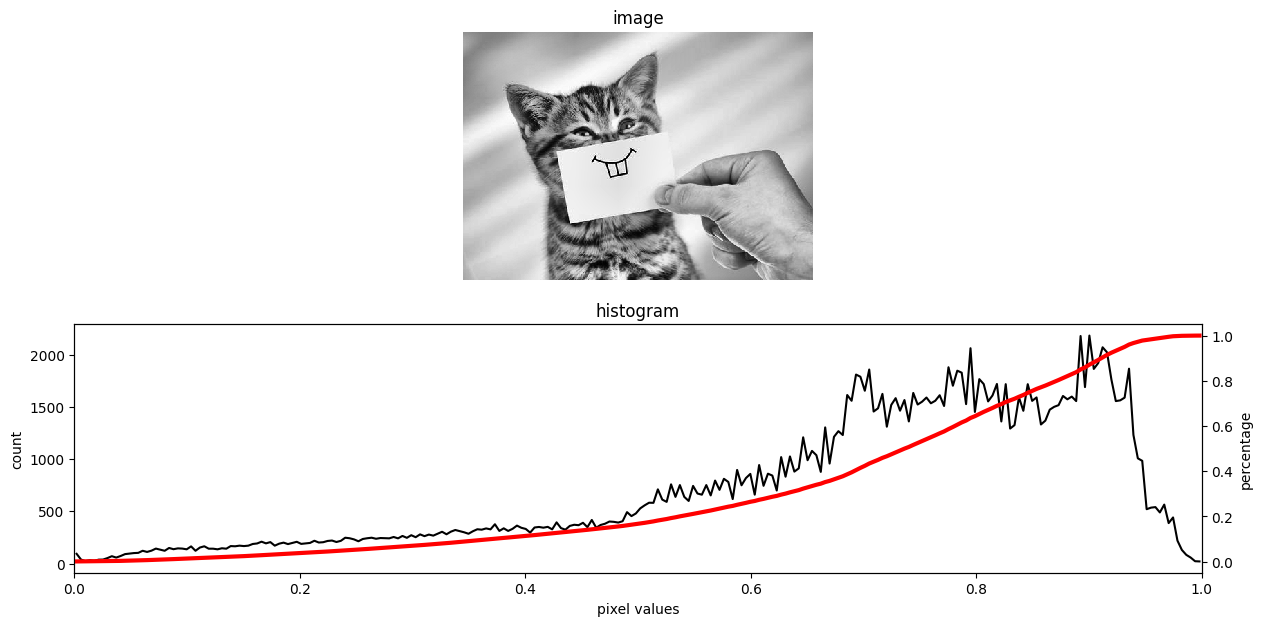

In [71]:
I_CLAHE = exposure.equalize_adapthist(I, kernel_size=(64, 64), clip_limit=0.01)
plot_img_and_hist(I_CLAHE)

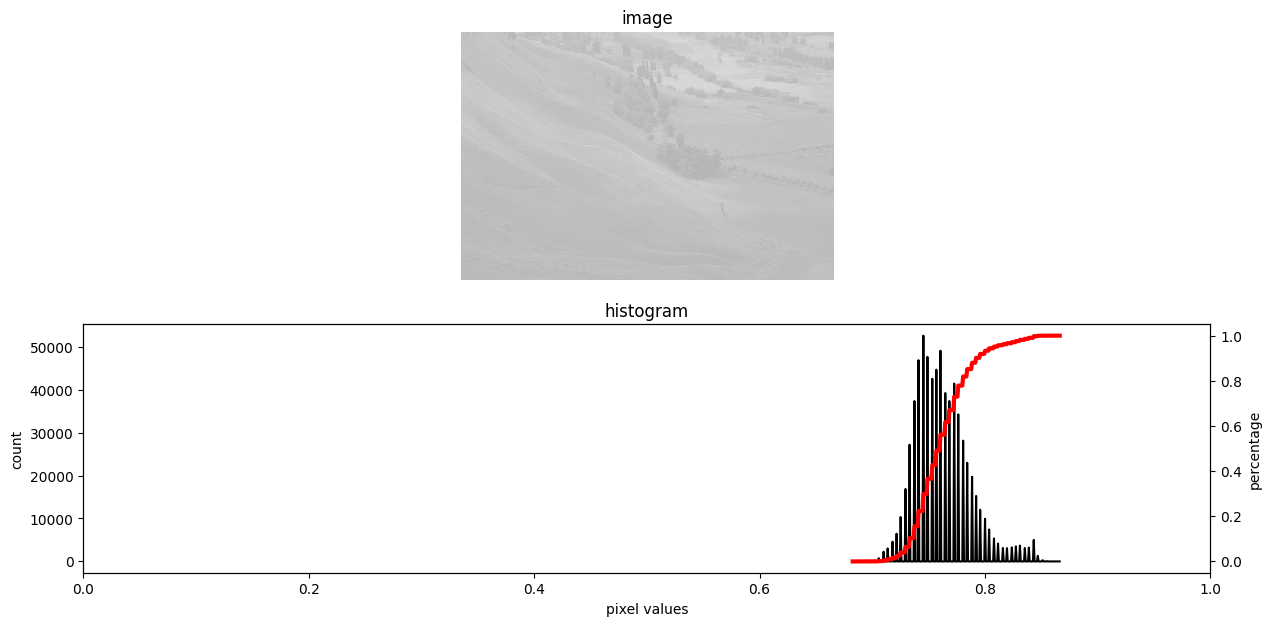

In [75]:
I = io.imread("/content/land.jpeg")
I = I/255
plot_img_and_hist(I)

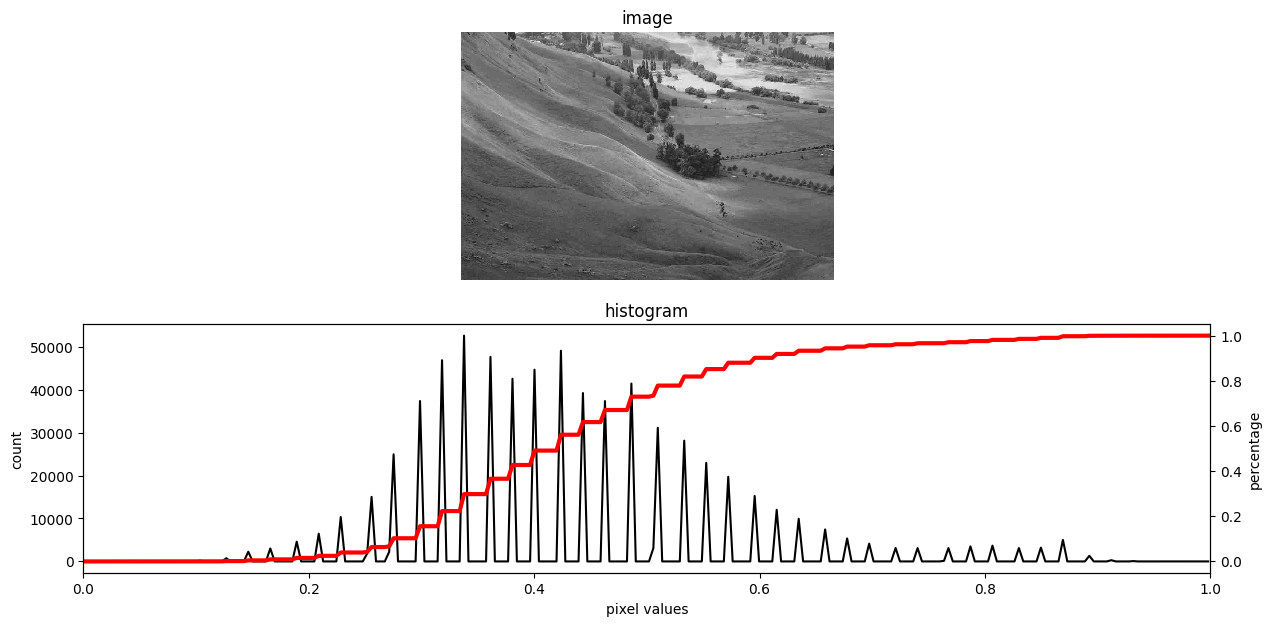

In [78]:
I_CLAHE = exposure.equalize_adapthist(I, kernel_size=(36, 36), clip_limit=0.001)
plot_img_and_hist(I_CLAHE)

In [ ]:
io.imshow(I_CLAHE)